In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('Mall_Customers.csv')
df.reset_index(drop=True, inplace=True)
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
# Changing last two column names for easier analysis
df.rename(index=str, columns={'Annual Income (k$)': 'AnnualIncome',
                              'Spending Score (1-100)': 'Score',
                              'Genre': 'Gender'}, inplace=True)
df.head()

,CustomerID,Gender,Age,AnnualIncome,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
df = df.drop(['CustomerID', 'Gender'], axis = 1)

In [26]:
df.head()

,Age,AnnualIncome,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler # Visualizing the elbow for number of clusters

In [28]:
clusters  = []

C:\Users\Sheryar Kahout\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


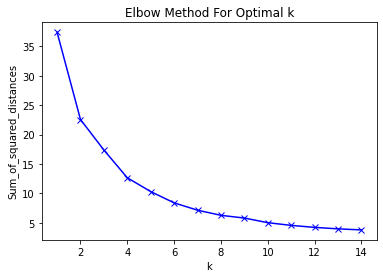

In [29]:
mms = MinMaxScaler()
mms.fit(df)
df_transformed = mms.transform(df)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

* It appears that nclusters = 5 would be good enough however we can also make a valid case for nclusters = 3.
* I will do both to compore the results visually.

* Kmeans with n_clusters = 3

In [30]:
import seaborn as sns

C:\Users\Sheryar Kahout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


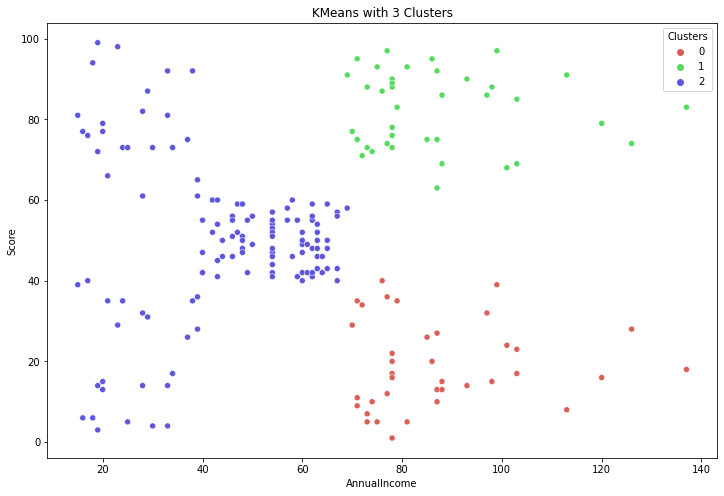

In [31]:
kmeans3 = KMeans(n_clusters=3, random_state = 0).fit(df)

df['Clusters'] = kmeans3.labels_

#lets visualize our plot
plt.figure(figsize=(12, 8))
sns.scatterplot(df['AnnualIncome'], df['Score'], hue=df['Clusters'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

* Kmeans with nclusters = 5

C:\Users\Sheryar Kahout\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


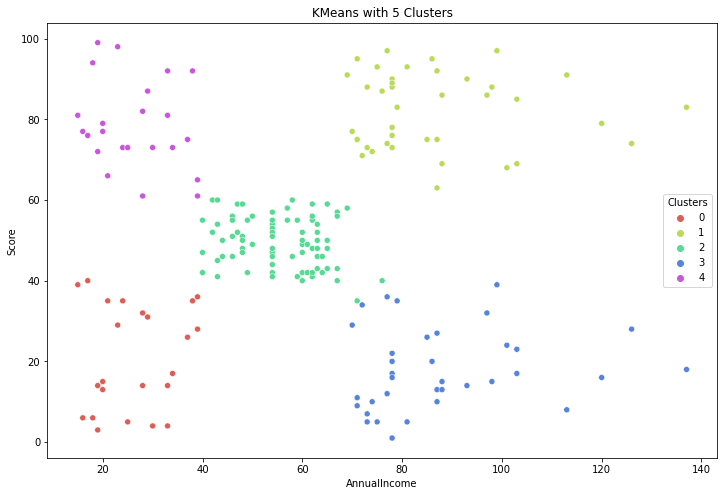

In [32]:
kmeans5 = KMeans(n_clusters=5, random_state = 0).fit(df)

df['Clusters'] = kmeans5.labels_

#lets visualize our plot
plt.figure(figsize=(12, 8))
sns.scatterplot(df['AnnualIncome'], df['Score'], hue=df['Clusters'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()